# **Logistic Modelling Using Newton's Method**



*  Terdapat berbagai cara untuk membuat klasifikasi pada data, salah satunya adalah menggunakan model logistik. Dalam menggunakan model logistik dapat juga digunakan metode newton. Umumnya, metode newton merupakan metode penyelesaian masalah untuk sistem persamaan nonlinear menggunakan skema iteratif/perulangan. 
*   Klasifikasi menggunakan metode newton memerlukan parameter betha. Parameter betha yang akan ditemukan akan terlebih dahulu dicari untuk kemudian dipakai pada proses klasifikasi data.
*Berikut ini adalah parameter-parameter yang digunakan dalam mencari betha yang optimal.

> ![picture](https://drive.google.com/uc?export=view&id=1kU5pZXN9oBMPFUmnZr7i6QX-WpiIZQPH)



---

Dataset yang digunakan adalah dataset data Transaksi Fraudulent dan Non-fraudulent yang berasal dari website data mining cup 2019. Namun, pada pengerjaan klasifikasi kali ini data sudah terlebih dahulu di preprocess menggunakan one hot encoding yang mengubah kolom data numerik menjadi kategorikal. Dataset dapat diakses melalui link dibawah ini.

https://drive.google.com/file/d/1zssdQonNRtk1MvNIEIyBvBKcefk1gfRh/view?usp=sharing

**Persiapan Data dan Library**

In [129]:
#Persiapan library untuk mempermudah proses keseluruhan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix

In [130]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [131]:
pure = pd.read_csv('/content/drive/My Drive/fraudulent_non-fraudulent_transaction.csv')

In [132]:
#Sampling pada data dengan memperhatikan keseimbangan jumlah kelas
#Masing-masing kelas akan memiliki jumlah yang imbang
count = 100
data = pure.copy()
data = data.rename(columns={'fraud_0': 'fraud'})
data.drop('fraud_1', inplace=True, axis=1)
data1 = data[data['fraud']==0].sample(int(count))
data2 = data[data['fraud']==1].sample(int(count))
data = data1.append(data2, ignore_index = True)

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     200 non-null    int64  
 1   trustLevel_1                   200 non-null    float64
 2   trustLevel_2                   200 non-null    float64
 3   trustLevel_3                   200 non-null    float64
 4   trustLevel_4                   200 non-null    float64
 5   trustLevel_5                   200 non-null    float64
 6   trustLevel_6                   200 non-null    float64
 7   totalScanTimeInSeconds_hi      200 non-null    float64
 8   totalScanTimeInSeconds_lo      200 non-null    float64
 9   totalScanTimeInSeconds_med     200 non-null    float64
 10  grandTotal_hi                  200 non-null    float64
 11  grandTotal_lo                  200 non-null    float64
 12  grandTotal_med                 200 non-null    flo

In [134]:
X = data.iloc[:,1:30]
y = data.iloc[:,31]

In [135]:
col = np.linspace(1.0, 1.0, len(X))
X.insert(loc=0, column='addedFeature', value=col)

In [136]:
X.head(10)

,addedFeature,trustLevel_1,trustLevel_2,trustLevel_3,trustLevel_4,trustLevel_5,trustLevel_6,totalScanTimeInSeconds_hi,totalScanTimeInSeconds_lo,totalScanTimeInSeconds_med,grandTotal_hi,grandTotal_lo,grandTotal_med,lineItemVoids_hi,lineItemVoids_lo,lineItemVoids_med,scansWithoutRegistration_hi,scansWithoutRegistration_lo,scansWithoutRegistration_med,quantityModifications_hi,quantityModifications_lo,quantityModifications_med,scannedLineItemsPerSecond_hi,scannedLineItemsPerSecond_lo,scannedLineItemsPerSecond_med,valuePerSecond_hi,valuePerSecond_lo,valuePerSecond_med,lineItemVoidsPerPosition_hi,lineItemVoidsPerPosition_lo
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
9,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [137]:
y.tail(10)

190    1.0
191    1.0
192    1.0
193    1.0
194    1.0
195    1.0
196    1.0
197    1.0
198    1.0
199    1.0
Name: fraud, dtype: float64

**Logistic Modelling dengan Metode Newton**

Dalam menentukan parameter beta optimal terdapat langkah iteratif sebagai mana berikut.

![picture](https://drive.google.com/uc?export=view&id=1HWYbkfRp_pRCnM1usuovaDyOXjdLc-vU)

---

Terlihat pada gambar bahwa, perulangan akan terjadi dengan syarat jumlah iterasi lebih kecil dari N (parameter iterasi maksimal) dan nilai error lebih kecil dari nilai toleransi (TOLL) yang ditetapkan.

---



In [138]:
#rumus error
def error(bNew, bOld):
  return  min(np.absolute(bNew-bOld))

#rumus F(beta)
def fungsiF(X,y,p):
  X = X.transpose()
  return -1*(X)*(y-p)

#rumus J(beta)
def fungsiJ(X,V):
  XTranspose = X.transpose().to_numpy()
  X = X.to_numpy()
  V = V.to_numpy()
  return XTranspose@X@V

#rumus pi
def pi(z):
  return (np.exp(z))/(1+np.exp(z))

#rumus z
def findZ(beta,idx):
  temp = beta[0]
  col = X.columns
  n = len(col)
  i = 1
  # print(beta[i],X[col[i]][i])
  while(i<n):
    temp += beta[i]*X[col[i]][idx]
    i += 1
  return temp

#fungsi V
def findV(pi):
  V = []
  col = A_train.columns
  #perulangan untuk menyisipkan baris sepanjang jumlah pi dan sebanyak jumlah pi
  for i in range(len(col)):
    row = np.linspace(0.0, 0.0, len(col))
    V.append(row)
  #perulangan untuk menghitung Vi(B)
  for i in range(len(col)):
    for j in range(len(col)):
      if i == j:
        if i == 0:
          V[i][j] = 1
        else:
          # print(i,j,V[i][j],pi[i])
          V[i][j] = pi[i]*(1-pi[i])
  return V

def matriglar(a):
  return a.shape[0] == a.shape[1] and np.linalg.matrix_rank(a) == a.shape[0]

---
Sebelum memasuki proses iterasi newton untuk mencari beta optimal, dataset dibagi terlebih dahulu dalam data latih dan data uji. Data latih akan digunakan parameter beta optimal, sementar data uji akan digunakan sebagai data klasifikasi.

---



In [139]:
A = X.copy()
Y = y.copy()
A_train, A_test, y_train, y_test = train_test_split(A, Y, test_size=0.4, random_state=1) 
col = X.columns
beta = np.linspace(0.0, 0.0, len(col))
p = []

In [140]:
A_train = A_train.reset_index(drop=True)
A_test = A_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [141]:
TOL = 0.0001
N = 20

In [142]:
import numpy as geek 
#step 1
k= 1
betaold=np.linspace(1.0, 1.0, len(col))

#Step 2 
while (k<=N) and (error(beta,betaold)>TOL) :
  pnew = []
  for i in range(len(A_train)):
    z = findZ(beta,i)
    pnew.append(pi(z))
  p = pnew
  V = pd.DataFrame(findV(p))
  #step 3
  F = (fungsiF(A_train,y_train,p)).to_numpy()
  J = fungsiJ(A_train,V)
  #step 4
  yy = np.linalg.pinv(J)@(F)
  betaold = beta
  #step 5
  beta = geek.subtract(beta,yy.transpose())
  beta = beta[0]
  k += 1
  
print('iteration: ', k)
print('error: ',error(beta,betaold))
print(beta)

iteration:  21
error:  0.001901633279926207
[-2.69895687e-05 -7.16931655e-01  2.06201535e-01 -1.16653409e+00
 -6.89456311e-01  2.60015457e+00  8.64628520e-01  2.59602145e+00
 -5.59168261e+00  1.74925882e+00 -1.53741635e+00  1.33266016e+00
 -2.73101386e-02 -4.11113686e-01  5.74778449e-01 -3.19572044e-01
  1.34281266e-01 -7.09434793e-01  1.17041091e+00 -1.12645215e+00
  1.42742033e+00 -1.48466921e-01  6.25836689e-01 -1.90091326e+00
 -5.35133588e-01  3.98201282e+00 -2.44808612e+00 -8.99542171e-01
  1.16499463e+00  5.30292047e-01]


Pada proses running code sebelumnya didapati parameter beta yang optimal setelah iterasi ke 21 dengan nilai error 0.001901633279926207. Terlihat sebagaimana berikut.

![picture](https://drive.google.com/uc?export=view&id=1mLkn19C0rPSBsCAbvjA9wwF37IlfFCQo)

---

Selanjutnya adalah penghitungan nilai kelas (phi) menggunakan parameter betha yang optimal.

---



In [143]:
p=[]
for i in range(len(A_test)):
  z = findZ(beta,i)
  p.append(pi(z))



---


Data uji yang sudah melalui proses penghitungan nilai kelas (phi) akan memiliki nilai yang berkisar antara 0.0 sampai 1.0. Selanjutnya adalah pembuatan aturan klasifikasi yang mana akan menempatkan masing-masing baris kepada kelas yang sesuai (0 dan 1)


---

Pada proses running code sebelumnya ditemukan nilai aturan yang memiliki akurasi klasifikasi yang terbesar yaitu 0.6. Nilai aturan tersebut adalah 0.536.Aturan ini mengartikan bahwa p > 0.536 akan diklasifikasikan sebagai kelas 1 (terjadi penipuan), dan jika p < 0.536 data akan diklasifikasikan sebagai kelas 0 (tidak terjadi penipuan). Berikut adalah hasilnya.



> ![picture](https://drive.google.com/uc?export=view&id=1Z8jinEjxxWXXnIOo4Lnl0H4zUG4TqFK4)




Aturan:  0.536 ; Akurasi:  0.6


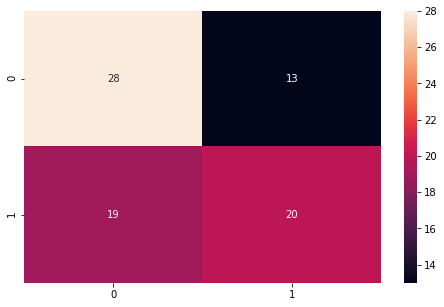

              precision    recall  f1-score   support

         0.0       0.60      0.68      0.64        41
         1.0       0.61      0.51      0.56        39

    accuracy                           0.60        80
   macro avg       0.60      0.60      0.60        80
weighted avg       0.60      0.60      0.60        80



In [144]:
from sklearn.metrics import accuracy_score

rules = list(np.arange(0.0,1.0,0.002))
accuracy = 0
rule = 0
kelas = []
for i in range (len(rules)):
  temp = []
  for j in range(len(p)):
    if p[j] > rules[i]:
      temp.append(1)
    else:
      temp.append(0)
  score = accuracy_score(y_test, temp)
  if score > accuracy:
    accuracy = score
    rule = rules[i]
    kelas = temp

print("Aturan: ",rule,"; Akurasi: ",accuracy)

#plotting confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, kelas), annot=True, fmt=".0f", ax=ax)
plt.show()
#metrik pengukuran hasil klasifikasi
print (classification_report(y_test, kelas))

---

Hasil akurasi dari setiap proses running code berkemungkinan berubah-ubah. Hal ini dikarenakan dataset yang digunakan adalah dataset hasil sampling pada program.


---